# Homework 2
Computational Physics 640-440 F2022


## Student Information<a id = "student_information"></a>

Fill out the following fields:

# Student name: Ismail Olumegbon  
# Student e-mail: ismailo1@umbc,edu
# Student ID: CX69336    

In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from IPython.display import display, Image

## Problem 1 (20%) - Matplotlib excercises</a>
1. Line plot and symbols
Plot the following figure ("click on the link Figure to Plot below") using numpy & Matplotlib. Your figure needs to have <br> 
1)	x & y labels <br> 
2)	Use Latex symbols for x-ticks<br> 
3)	Legends <br> 
4)	Grid <br> 

[Figure to plot](https://blackboard.umbc.edu/bbcswebdav/courses/PHYS440_15626_FA2021/Picture1.png)

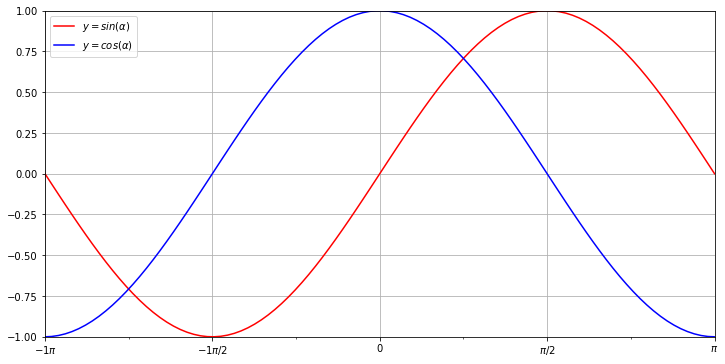

In [2]:
x=np.linspace(-np.pi,np.pi,100)
#x=np.linspace(-np.\u03C0 value,np.\u03C0 value,0.1)
y=np.sin(x)
z=np.cos(x)
fig,ax=plt.subplots(figsize=[12,6])
ax.plot(x,y,label=r'$y=sin(\alpha)$',c='r')
ax.plot(x,z,label=r'$y=cos(\alpha)$',c='b')

# Set up grid, legend, and limits
ax.grid(True)
ax.set_xlim(-np.pi,np.pi)
ax.set_ylim([-1, 1])
ax.legend(loc='upper left')
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 4))

def format_func(value, tick_number):
    # find number of multiples of pi/2
    N = int(np.round(2 * value / np.pi))
    if N == 0:
        return "0"
    elif N == 1:
        return r"$\pi/2$"
    elif N == 2:
        return r"$\pi$"
    elif N % 2 > 0:
        return r"${0}\pi/2$".format(N)
    else:
        return r"${0}\pi$".format(N // 2)

ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
plt.show()

***

## Problem 2 (20%) - Comput Pi 


Write two programs to compute the value of π, <br>
one using the  [George-Leibniz series](https://en.wikipedia.org/wiki/Leibniz_formula_for_%CF%80) and  <br>
the other use Monte Carlo method; <br>
plot the values of π from both methods as a function of number of terms (as in the slides shown in class)



3.139592655589785
3.104


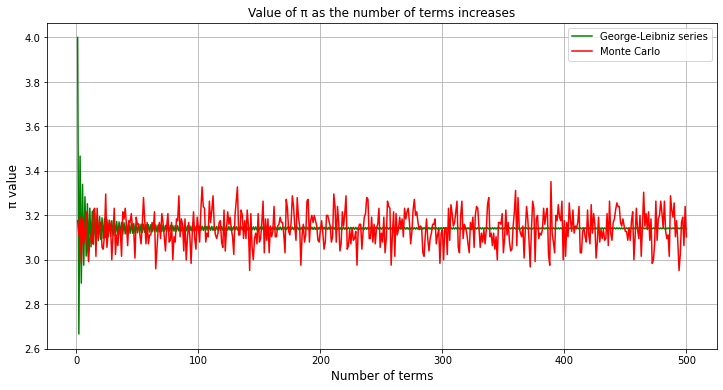

In [3]:
N = 500

sum = 0
sum_n = []
for k in range(1, N + 1):
    greg_series = 4*((-1)**(k + 1))/(2*k - 1)
    sum += greg_series
    sum_n.append(sum)
print(sum)

sum_m = []
for l in range(1, N + 1):
    Ninside = 0
    x = np.random.random(N)
    y = np.random.random(N)
    r = np.sqrt(x**2+y**2)
    inside = r < 1.0;
    Ninside = np.sum(inside)
    Pinside = Ninside / N
    pi_m = 4 * Pinside
    sum_m.append(pi_m)
print(pi_m)

fig,ax=plt.subplots(figsize=[12,6])
number = np.arange(1,N + 1)
ax.plot(number,sum_n,label = r'George-Leibniz series', c='g')
ax.plot(number,sum_m,label = r'Monte Carlo',c='r')
ax.set_xlabel('Number of terms',fontsize='large')
ax.set_ylabel('\u03C0 value',fontsize='large')
ax.grid(True)
ax.set_title('Value of \u03C0 as the number of terms increases')
ax.legend()
plt.show()

***

## Problem 3 (30%) - Find the intersection area of two ellipses
Use Monte-Carlo method to compute the intersection area of two ellipses (click on the Figure below to see illustration) <br>
**Ellipse A**: Major axis a= 2, minor axis b=1; center = (0,0) <br>
**Ellipse B**: Major axis a= 2, minor axis b=0.5; center = (1,1) <br>

compute the intersection area

[Figure](https://blackboard.umbc.edu/bbcswebdav/courses/PHYS440_15626_FA2021/Ellipse_intersection.png)

The fraction of the intersecting area is  0.2204201834675572 of the horizontal ellipse area, and 0.44137377765409486 of the vertical ellipse area
The area of the intersection is 1.3851204329101294 unit square when computed with the horizontal ellipse, which is equivalent to 1.386796409389166 unit square when computed with the vertical ellipse


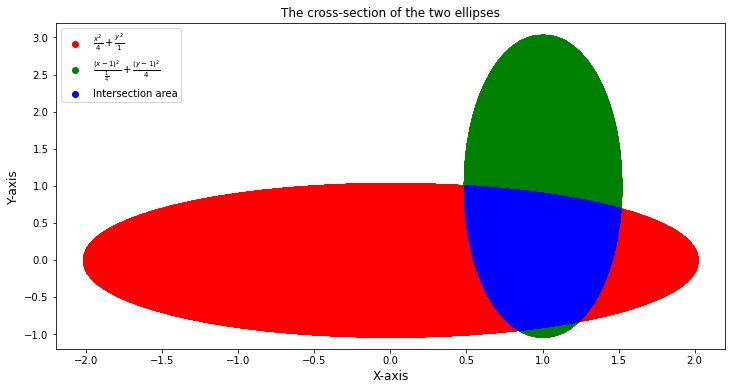

In [4]:

Ntotal = 10000000
Ninside = 0
Ninside2 = 0
A_int = 0
a1 = 2
b1 = 1
a2 = 0.5
b2 = 2
u = 1
v = 1
x = np.random.uniform(-2,2, Ntotal)
y = np.random.uniform(-3,5, Ntotal)
r1 = x**2/a1**2+y**2/b1**2
r2 = (x-u)**2/a2**2+(y-v)**2/b2**2

inside = r1 < 1.0
inside_v = r2 < 1.0
intersection = inside & inside_v
Ninside = np.sum(inside)
Ninside2 = np.sum(inside_v)
A_int = np.sum(intersection)
Pinside1 = Ninside / Ntotal
Pinside2 = Ninside2 / Ntotal
frac_int1 = A_int / Ninside
frac_int2 = A_int / Ninside2
    
fig,ax = plt.subplots(figsize=[12,6])
ax.scatter(x[inside],y[inside],c='r', label = r'$\frac{x^2}{4} + \frac{y^2}{1}$')
ax.scatter(x[inside_v],y[inside_v],c='g', label = r'$\frac{(x-1)^2}{\frac{1}{4}} + \frac{(y-1)^2}{4}$')
ax.scatter(x[intersection],y[intersection],c='b', label = r'Intersection area')
ax.set_xlabel('X-axis',fontsize='large')
ax.set_ylabel('Y-axis',fontsize='large')
ax.set_title('The cross-section of the two ellipses')
ax.legend()
       
print(f'The fraction of the intersecting area is  {frac_int1} of the horizontal ellipse area, and {frac_int2} of the vertical ellipse area')

#Area of the an ellipse is pi*a*b
Area1 = 3.142*a1*b1*frac_int1
Area2 = 3.142*a2*b2*frac_int2
print(f'The area of the intersection is {Area1} unit square when computed with the horizontal ellipse, which is equivalent to {Area2} unit square when computed with the vertical ellipse')

## Problem 4 (30%) - Normal distributions
Two friends Adam and Bill play basketball together. the basket is located between $-0.5<x<0.5$<br>


*   When **Adam** throws the ball, the placement of his ball follows a [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution)  with the "mean" location at $<x>$=0 and standard deviation $\sigma$ = 1
*   When **Bill** throws the ball, the placement of his ball follows a [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution)  with the "mean" location at $<x>$=0.2 and standard deviation $\sigma$ = 0.8


Who has a better chance to win a game if they each throws the ball for 10 times?

1) Use the [normal random generator](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html#numpy.random.Generator.normal) to simulate the games
2) Try to use statistic theory to predict the game (Hint: you can use the Cumulative Dirtribution given below). 



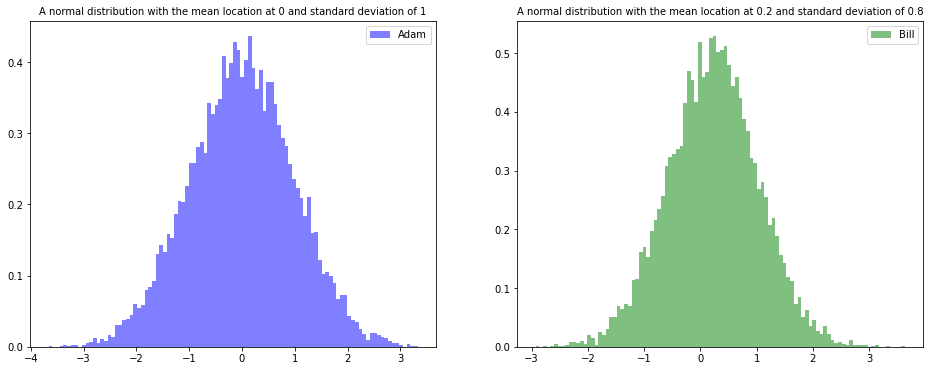

In [17]:
#mu, sigma = 0.2, 0.8 # mean and standard deviation
RN1_Adam = np.random.default_rng().normal(0, 1, 10000)
RN2_Bill = np.random.default_rng().normal(0.2, 0.8, 10000)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[16,6])
ax1.hist(RN1_Adam,density=True,bins=100, alpha=0.5, color='blue', label="Adam")
ax1.set_title("A normal distribution with the mean location at 0 and standard deviation of 1", fontsize=10)
ax2.hist(RN2_Bill, density=True,bins=100, alpha =0.5, color='green', label="Bill")
ax2.set_title("A normal distribution with the mean location at 0.2 and standard deviation of 0.8", fontsize=10)
ax1.legend()
ax2.legend()
plt.show()

In [34]:
Ntotal = 10000
Adam_basket = 0
Bill_basket = 0
for i in range(Ntotal):    
    #Adam
    Adam_x = np.random.default_rng().normal(0, 1, 10)
    Adam_inside = (Adam_x>-0.5) & (Adam_x<0.5)
    Adam_Ninside = np.sum(Adam_inside)
    Adam_Pinside = Adam_Ninside / 10
    Adam_basket +=Adam_Pinside
    #Bill
    Bill_x = np.random.default_rng().normal(0.2, 0.8, 10)
    Bill_inside = (Bill_x >-0.5) & (Bill_x<0.5)
    Bill_Ninside = np.sum(Bill_inside)
    Bill_Pinside = Bill_Ninside / 10
    Bill_basket +=Bill_Pinside
    
Adam_probability = Adam_basket/Ntotal
Bill_probability = Bill_basket/Ntotal

print("Probability of Adam's throw:", Adam_probability)
print("Probability of Bill's throw:",Bill_probability)
if Adam_probability > Bill_probability:
    print(f'Adam has a better chance of winning 10 rounds of basketball throws')
elif Adam_probability < Bill_probability:
    print(f'Bill has a better chance of winning 10 rounds of basketball throws')
else:
    print("It's a tie between Adam and bill as they have an equal chance in this 10 rounds of basketball throws")

Probability of Adam's throw: 0.38281000000001136
Probability of Bill's throw: 0.45502000000000337
Bill has a better chance of winning 10 rounds of basketball throws


Bill has a better chance of winning this 10 rounds of basketball throws


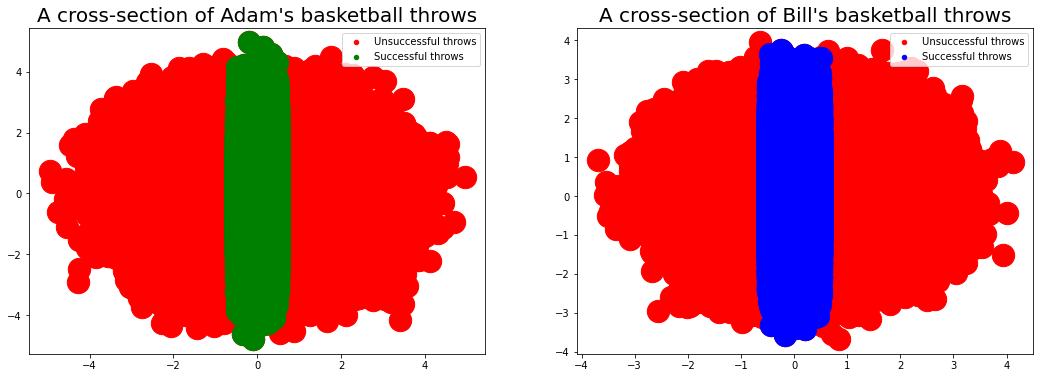

In [25]:
Ntotal = 1000000
#Adam
Adam_x = np.random.default_rng().normal(0, 1, Ntotal)
Adam_y = np.random.default_rng().normal(0, 1, Ntotal)
Adam_inside = (Adam_x >-0.5) & (Adam_x<0.5)

#Bill
Bill_x = np.random.default_rng().normal(0.2, 0.8, Ntotal)
Bill_y = np.random.default_rng().normal(0.2, 0.8, Ntotal)
Bill_inside = (Bill_x >-0.5) & (Bill_x<0.5)

#Plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[18,6])
ax1.scatter(Adam_x,Adam_y,c='r', label = r'Unsuccessful throws', s=500)
ax1.scatter(Adam_x[Adam_inside],Adam_y[Adam_inside],c='g', label = r'Successful throws', s=500)
ax1.set_title("A cross-section of Adam's basketball throws", fontsize=20)
ax1.legend(markerscale=0.2)
ax2.scatter(Bill_x,Bill_y,c='r', label = r'Unsuccessful throws', s=500)
ax2.scatter(Bill_x[Bill_inside],Bill_y[Bill_inside],c='b', label = r'Successful throws', s=500)
ax2.set_title("A cross-section of Bill's basketball throws", fontsize=20)
ax2.legend(markerscale=0.2)
plt.show

if Adam_Pinside > Bill_Pinside:
    print(f'Adam has a better chance of winning this 10 rounds of basketball throws')
elif Adam_Pinside < Bill_Pinside:
    print(f'Bill has a better chance of winning this 10 rounds of basketball throws')
else:
    print("It's a tie between Adam and bill as they have an equal chance in this 10 rounds of basketball throws")

In [7]:
def normal_CDF(x, mu=0,sigma=1):
  """
  mu: mean of the normal distribution
  sigma: standard deviatio of normal distribution
  """
  from scipy.special import erf
  CDF = 0.5*(1.0+erf((x-mu)/(np.sqrt(2)*sigma)))
  return CDF

In [38]:
#Adam
probability_adam = normal_CDF(0.5, mu=0,sigma=1) - normal_CDF(-0.5, mu=0,sigma=1)

#Bill
probability_bill = normal_CDF(0.5, mu=0.2,sigma=0.8) - normal_CDF(-0.5, mu=0.2,sigma=0.8)

print("Probability of Adam's throw:",probability_adam)
print("Probability of Bill's throw:",probability_bill)
if probability_adam > probability_bill:
    print(f'Adam has a better chance of winning this 10 rounds of basketball throws')
elif probability_adam < probability_bill:
    print(f'Bill has a better chance of winning this 10 rounds of basketball throws')
else:
    print("It's a tie between Adam and bill as they have an equal chance in this 10 rounds of basketball throws")

Probability of Adam's throw: 0.38292492254802607
Probability of Bill's throw: 0.45538281382021306
Bill has a better chance of winning this 10 rounds of basketball throws


***

<span style = "display: block; text-align:center;">PHYS640 Computational Physics HW2</span>